# Assignment 5: Geographic Data Analysis

In this assignment, you will be using a database of geographic data provided for you in the PySal library to create two plots, a choropleth map and a proportional symbol map. In addition to these two plots, you will compute the value of Moran's I for this data.

### Dataset

The dataset to be used in this assignment is a dataset containing Per Capita incomes for the United States' lower 48 states. In addition to the state-by-state data, the dataset contains shape files for each state that you can use
to create the choropleth and proportional symbol maps.

In [ ]:
#Installing Dependencies
!pip install pysal
!pip install geopandas
!apt install libspatialindex-c4v5

#Importing Libraries 
import geopandas as gpd
import numpy as np
import pandas as pd
import libpysal as lps
import pysal as ps
import matplotlib.pyplot as plt
import esda

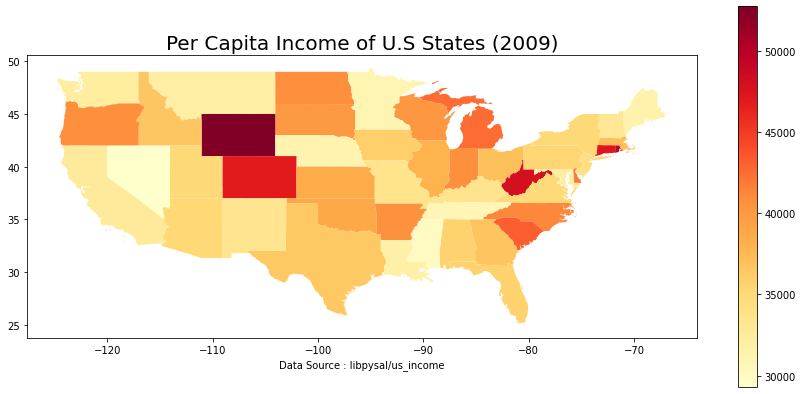

In [91]:
# Graded Part
# PartID: 5_1
# Part 1: Using the PySal Data, create a choropleth path of the United States
# that depicts the per capita income of each US state in 2009.
# Notes: The PySal and GeoPandas libraries both contain utility functions that
# may make this task easier.
mapPath = lps.examples.get_path('usjoin.csv')
finalMap = ps.lib.io.open(mapPath)
perCapita = gpd.read_file(ps.lib.examples.get_path("us48.shp"))
perCapita['per_cap'] = np.array(finalMap.by_col("2009"))
perCapita.plot(column = "per_cap", figsize=(15, 7), legend = True, cmap = 'YlOrRd')
plt.title('Per Capita Income of U.S States (2009)', fontsize = 20)
plt.xlabel('Data Source : libpysal/us_income')
plt.show()

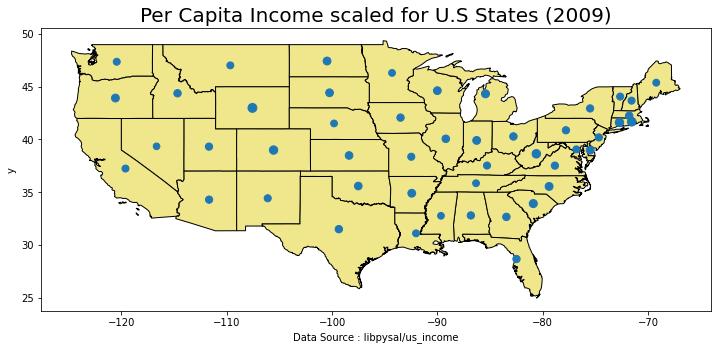

In [89]:
# Graded Part
# PartID: 5_2
# Part 2: Again using the PySal Data, create a proportional symbol map showing 
# a dot at the centroid of each state that is scaled to the per capita income 
# of each US state in 2009.
# Notes: The demonstration notebook for this unit contains code that performs 
# a similar task and may be a useful reference for your assignment.
perCapita['centroids'] = perCapita.centroid
centroidList = list(perCapita['centroids'])
x,y = [],[]
dataVal = list(perCapita['per_cap'])
for i in range(0, len(centroidList)):
  x.append(centroidList[i].x)
  y.append(centroidList[i].y)
df = pd.DataFrame({'x': xaxis, 'y': yaxis,'data': dataVal})
mapViz = perCapita.plot(color='khaki', edgecolor='black', figsize = (12, 7))
df.plot(kind='scatter', x='x', y='y', s = df['data'] * 0.0015, ax = mapViz)
plt.xlabel('Data Source : libpysal/us_income')
plt.title('Per Capita Income scaled for U.S States (2009)', fontsize = 20)
plt.show()

In [40]:
# Graded Part
# PartID: 5_3
# Part 3: Using the same data, compute the value of Moran's I for the per 
# capita income of each US state in 2009 using Rook Continuity. Report the 
# value of I rounded to 4 decimal places (i.e. x.XXXX)
# Notes: Again, the PySal and GeoPandas libraries may contain useful utility
# functions.
x = perCapita['per_cap']
y = ps.lib.io.open(ps.lib.examples.get_path("states48.gal")).read()
morans = esda.Moran(x, y, two_tailed = False)
final = round(morans.I, 4)
print

0.4288
